Last updated on Fri Sep 30 14:35:49 2022


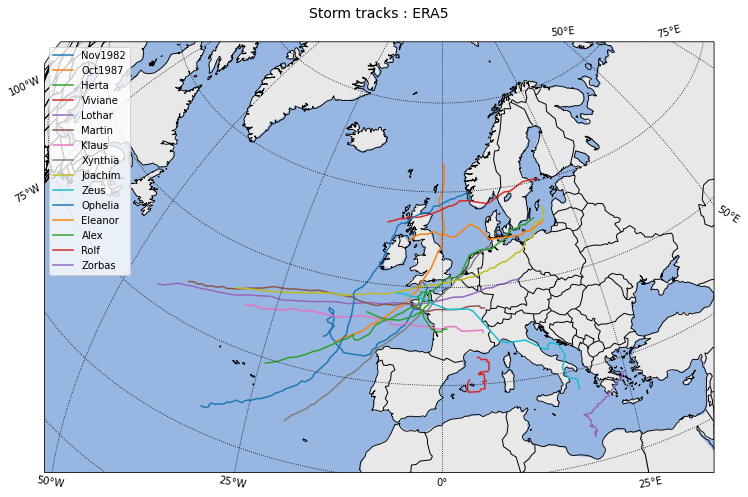

In [2]:
import os

import xarray as xr
import netCDF4

import math
import numpy as np
from scipy.ndimage import gaussian_filter
import cartopy
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.collections as collections

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
 
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))


storms=['Nov1982','Oct1987','Herta',
        'Viviane','Lothar','Martin',
        'Klaus','Xynthia','Joachim', 'Zeus',
        'Ophelia','Eleanor', 'Alex', 'Rolf', 'Zorbas']
#latS=30 #uncomment the #ax.set_extent(*bounds, crs=ccrs.PlateCarree()) to apply this 4 lines
#latN=70
#lonW=-60
#lonE=35
#projection=ccrs.PlateCarree()
projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=45.0)
#bounds = [(lonW, lonE, latS, latN)]
#coast = cfeature.NaturalEarthFeature(category='physical', scale='110m', facecolor='none', name='coastline')
                             
fig = plt.figure(figsize=(12., 8.))
#fig.suptitle('Storm tracks : ERA5',fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())

#ax.set_title('Storm tracks : ERA5',loc='center',fontsize=14)
#ax.add_feature(coast, edgecolor='gray')
#ax.gridlines()


# Add the gridlines
gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
# Add features
ax.add_feature(cartopy.feature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)
ax.coastlines('50m', linewidth=0.9, edgecolor='black')
#ax.coastlines(color='black')#
 
gl.top_labels = gl.right_labels = False    
gl.xlabel_style = {'size':10, 'color':'black'}  
gl.ylabel_style = {'size':10, 'color':'black'}
#ax.set_title(scheme_name[n],fontsize=10) #.
ax.set_title('Storm tracks : ERA5',loc='center',fontsize=14)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax.set_extent(*bounds, crs=ccrs.PlateCarree()) #Original bounds, uncomment &comment above line
#ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
#ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)

for storm in storms:

#--  Open storm track file
    liste_time,liste_lon,liste_lat,liste_pres=np.loadtxt('/mnt/g/RegCM4/Python/cru_2011.2020.pre/txt/'+storm+'.txt',skiprows=0, dtype='U13,float,float,int',unpack=True)
    date1=str(liste_time[0])
    date2=str(liste_time[-1])
    #ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm+' '+date1+'-'+date2) #original
    ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm ) #+' '+date1+'-'+date2)
    #ax.text(liste_lon[0]-1, liste_lat[0], storm, verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree()._as_mpl_transform(ax),
    #bbox=dict(alpha=0.1, boxstyle='round'))

ax.legend(loc='upper left')
plt.show()


#time_strs = [str(i.values)[1:].replace("_"," ") for i in da_time]
#time_strs

In [4]:
import numpy as np
from netCDF4 import Dataset
from matplotlib import colorbar, colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import geopandas as gpd
import geopandas
import pandas as pd
from shapely.geometry import Point
import csv
import matplotlib.pylab as plt
from matplotlib import colorbar, colors
import datetime as datetime

print('Last updated on {}'.format(datetime.datetime.now().ctime()))

#Data https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SI.list.v04r00.csv

# Open the file for cyclone metadata to read csv data

idai_Ibtracs_path_loc = open('/mnt/g/RegCM4/Python/cru_2011.2020.pre/Track_path_data/Idai_Ibtracs.csv', 'r') #Idai-path.csv', 'r')
#kenneth_Ibtracs_path_loc = open('/mnt/g/RegCM4/Python/cru_2011.2020.pre/Track_path_data/Kenneth_Ibtracs2.csv', 'r') #Kenneth-path.csv', 
#TC_modelled_path_loc = pd.read_csv(TC_modelled_path_loc, delimiter = ',')
#Ibtracs_path = pd.read_csv(TC_modelled_path_loc, header=None, names=["NAME", "datetime", "lat", "long", "Pcentre", "MaxWind"])

idai_path = pd.read_csv(idai_Ibtracs_path_loc, header=None, names=["NAME", "ISO_TIME", "LAT", "LON", "WMO_WIND", "WMO_PRES", "REUNION_LAT", "REUNION_LON", "REUNION_TYPE", "REUNION_WIND", "REUNION_PRES", "STORM_SPEED", "STORM_DIR"])



idai_path = idai_path.drop(columns=["NAME", "LAT", "LON","REUNION_TYPE","REUNION_WIND","STORM_SPEED", "WMO_WIND", "WMO_PRES","STORM_DIR"])
 #drop the useless columns
print(idai_path)
#kenneth_path = pd.read_csv(kenneth_Ibtracs_path_loc, header=None, names=["NAME", "ISO_TIME", "LAT", "LON", "WMO_WIND", "WMO_PRES", "REUNION_LAT", "REUNION_LON", "REUNION_TYPE", "REUNION_WIND", "REUNION_PRES", "STORM_SPEED", "STORM_DIR"])
#kenneth_path = kenneth_path.drop(columns=['NAME','REUNION_TYPE']) #drop the useless columns

#convert the windspeed to m/s (currently in knots) #original~ Ibtracs_path['MaxWind'] = Ibtracs_path['MaxWind']*0.51444
#idai_path['REUNION_WIND'] = idai_path['REUNION_WIND']*0.51444

Last updated on Fri Sep 30 14:35:54 2022
            ISO_TIME  REUNION_LAT  REUNION_LON  REUNION_PRES
0    2019-03-09 6:00     -17.0000      40.2000        1000.0
1    2019-03-09 9:00     -16.9424      40.7228         999.0
2   2019-03-09 12:00     -16.9000      41.2000         998.0
3   2019-03-09 15:00     -16.9850      41.6523         997.0
4   2019-03-09 18:00     -17.1000      42.0000         996.0
5   2019-03-09 21:00     -17.1574      42.1876         994.0
6    2019-03-10 0:00     -17.2000      42.3000         992.0
7    2019-03-10 3:00     -17.2650      42.4425         991.0
8    2019-03-10 6:00     -17.3000      42.6000         990.0
9    2019-03-10 9:00     -17.2650      42.8075         988.0
10  2019-03-10 12:00     -17.2000      43.0000         987.0
11  2019-03-10 15:00     -17.1350      43.1375         982.0
12  2019-03-10 18:00     -17.1000      43.2000         978.0
13  2019-03-10 21:00     -17.1350      43.1725         973.0
14   2019-03-11 0:00     -17.2000      43.10

In [5]:
#time_strs = [str(i.values)[1:].replace("_"," ") for i in da_time]
#time_strs
#time_strs = [str(i.values)[2:].replace(" ","T") for i in idai_path]
#time_strs

Last updated on Fri Sep 30 18:10:25 2022


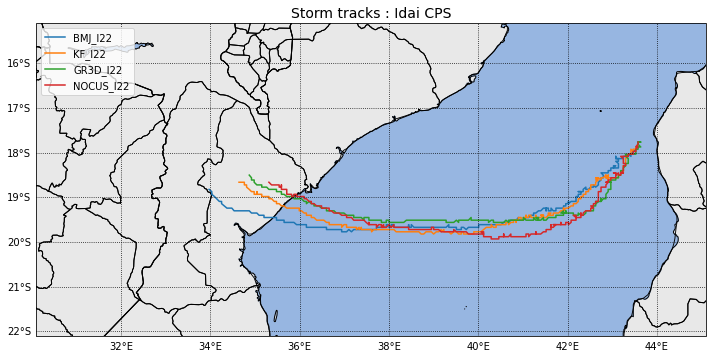

In [93]:
import os

import xarray as xr
import netCDF4

import math
import numpy as np
from scipy.ndimage import gaussian_filter
import cartopy
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.collections as collections

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
 
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))


#storms=['Nov1982','Oct1987','Herta',
#        'Viviane','Lothar','Martin',
#        'Klaus','Xynthia','Joachim', 'Zeus',
#        'Ophelia','Eleanor', 'Alex', 'Rolf', 'Zorbas']
#storms=['BMJ_I', 'BMJ_K','KF_I2','KF_K2','GR3D_I2','GR3D_K2','NOCUS_I2','NOCUS_K2']
storms=['BMJ_I22','KF_I22','GR3D_I22','NOCUS_I22']

#latS=30 #uncomment the #ax.set_extent(*bounds, crs=ccrs.PlateCarree()) to apply this 4 lines
#latN=70
#lonW=-60
#lonE=35
projection=ccrs.PlateCarree()
#projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=45.0)
#bounds = [(lonW, lonE, latS, latN)]
#coast = cfeature.NaturalEarthFeature(category='physical', scale='110m', facecolor='none', name='coastline')
                             
fig = plt.figure(figsize=(12., 8.))
#fig.suptitle('Storm tracks : ERA5',fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=projection)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax = plt.subplot(3,2,1, projection=ccrs.PlateCarree())

#SWIO
#ax.set_extent([30.1,70.1,-30.1, 0.1], crs=ccrs.PlateCarree())
#Idai
ax.set_extent([30.1,45.1,-22.1, -15.1], crs=ccrs.PlateCarree())
#Kenneth
#ax.set_extent([30.1,70.1,-30.1, 0.1], crs=ccrs.PlateCarree())
#ax.set_title('Storm tracks : ERA5',loc='center',fontsize=14)
#ax.add_feature(coast, edgecolor='gray')
#ax.gridlines()


# Add the gridlines
gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
# Add features
ax.add_feature(cartopy.feature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)
ax.coastlines('50m', linewidth=0.9, edgecolor='black')
#ax.coastlines(color='black')# 
gl.top_labels = gl.right_labels = False    
gl.xlabel_style = {'size':10, 'color':'black'}  
gl.ylabel_style = {'size':10, 'color':'black'}
#ax.set_title(scheme_name[n],fontsize=10) #.
ax.set_title('Storm tracks : Idai CPS',loc='center',fontsize=14)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax.set_extent(*bounds, crs=ccrs.PlateCarree()) #Original bounds, uncomment &comment above line
#ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
#ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)

for storm in storms:

#--  Open storm track file
    liste_time,liste_lat,liste_lon,liste_pres=np.loadtxt('/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/x/'+storm+'.txt',skiprows=0,dtype='U13, float,float,int',unpack=True)
    date1=str(liste_time[0])
    date2=str(liste_time[-1])
    
    #print(liste_lon,liste_lat)
    #ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm+' '+date1+'-'+date2) #original
    ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm ) #+' '+date1+'-'+date2)
    #ax.text(liste_lon[0]-1, liste_lat[0], storm, verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree()._as_mpl_transform(ax),
    #bbox=dict(alpha=0.1, boxstyle='round'))

ax.legend(loc='upper left')
plt.show()


In [94]:
liste_time,liste_lat,liste_lon,liste_pres=np.loadtxt('/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/x/'+storm+'.txt',
        skiprows=0, dtype='U13,float,float,int',unpack=True)
date1=str(liste_time[0])
date2=str(liste_time[-1])

latS=-30 #uncomment the #ax.set_extent(*bounds, crs=ccrs.PlateCarree()) to apply this 4 lines
latN=0
lonW=30
lonE=75


In [95]:
def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):

    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        #print('Low '+str(i+1))
        #print(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], int(data[mxy[i], mxx[i]]))
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=12,
                clip_on=True, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(int(data[mxy[i], mxx[i]])),
                color=color, size=10, clip_on=True, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)

In [96]:
def make_animation():
    nbimages=len(time)
    # create a tuple of display durations, one for each frame
    first_last = 1000 #show the first and last frames for 1000 ms
    standard_duration = 1000 #show all other frames for 1000 ms
    durations = tuple([first_last] + [standard_duration] * (nbimages - 2) + [first_last])
    # load all the static images into a list
    images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(dir_anim)))]
    # save as an animated gif
    gif = images[0]
    gif.info['duration'] = durations #ms per frame
    gif.info['loop'] = 0 #how many times to loop (0=infinite)
    gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
    # verify that the number of frames in the gif equals the number of image files and durations
    Image.open(gif_filepath).n_frames == len(images) == len(durations)
    # clean png
    os.chdir(dir_anim)
    for f in glob.glob("*.png"):
        os.remove(f)
    os.chdir("../../")
    return Image

In [97]:
def make_animation2():
    nbimages=len(time)-1
    # create a tuple of display durations, one for each frame
    first_last = 1000 #show the first and last frames for 1000 ms
    standard_duration = 1000 #show all other frames for 1000 ms
    durations = tuple([first_last] + [standard_duration] * (nbimages - 2) + [first_last])
    # load all the static images into a list
    images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(dir_anim)))]
    # save as an animated gif
    gif = images[0]
    gif.info['duration'] = durations #ms per frame
    gif.info['loop'] = 0 #how many times to loop (0=infinite)
    gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
    # verify that the number of frames in the gif equals the number of image files and durations
    Image.open(gif_filepath).n_frames == len(images) == len(durations)
    # clean png
    os.chdir(dir_anim)
    for f in glob.glob("*.png"):
        os.remove(f)
    os.chdir("../../")
    return Image
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = np.deg2rad(lon1)
    lon2 = np.deg2rad(lon2)
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371
    return c * r
def get_bearing(lat1, lon1, lat2, lon2):
    dLon = (lon2 - lon1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    brng = (brng +360) % 360
    return brng

In [98]:
f1    = xr.open_dataset("/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/"+storm+"/idai_mslp_10-16.nc").sel(
    time=slice(date1,date2)).sel(
    latitude=slice(latN,latS)).sel(
    longitude=slice(lonW,lonE)) #"G:\RegCM4\Python\cru_2011.2020.pre\cps_txt\mslp\BMJ_I\idai_mslp_10-16.nc"

mslp = f1['msl']/100
lat  = mslp.latitude.values
time  = mslp.time.values
lon  = mslp.longitude.values

print(mslp)

<xarray.DataArray 'msl' (time: 38, latitude: 121, longitude: 181)>
array([[[1013.40625, 1012.29614, 1012.48206, ..., 1011.8558 ,
         1011.85913, 1011.86084],
        [1012.3681 , 1013.274  , 1013.4581 , ..., 1011.8491 ,
         1011.8357 , 1011.83905],
        [1013.2539 , 1014.1245 , 1013.7863 , ..., 1011.8307 ,
         1011.8089 , 1011.8039 ],
        ...,
        [1022.6788 , 1022.1262 , 1021.6306 , ..., 1020.4787 ,
         1020.63947, 1020.78174],
        [1022.4444 , 1021.989  , 1021.46655, ..., 1020.5239 ,
         1020.683  , 1020.8387 ],
        [1022.2117 , 1021.8834 , 1021.3259 , ..., 1020.54565,
         1020.70306, 1020.8605 ]],

       [[1013.56366, 1012.8755 , 1013.3962 , ..., 1013.7143 ,
         1013.74945, 1013.7679 ],
        [1012.5657 , 1013.6658 , 1014.18646, ..., 1013.61554,
         1013.639  , 1013.66077],
        [1013.38446, 1014.4242 , 1014.29865, ..., 1013.5268 ,
         1013.5419 , 1013.56195],
...
        [1018.26013, 1017.9889 , 1017.73444, ..., 

In [99]:
#mslp_filter = gaussian_filter(mslp, sigma=3.0)
lon_grid, lat_grid = np.meshgrid(lon, lat)
f2    = xr.open_dataset("/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/"+storm+"/gph.idai.10-16.nc").sel(
    time=slice(date1,date2)).sel(
    latitude=slice(latN,latS)).sel(
    longitude=slice(lonW,lonE))

lev = f2.level.values

z = f2['z']/9.81

thickness=z.sel(level=600)-z.sel(level=900)
print(z)
print(thickness)
print(np.min(thickness))
print(np.max(thickness))

<xarray.DataArray 'z' (time: 38, level: 3, latitude: 121, longitude: 181)>
array([[[[9699.1455 , 9699.721  , 9701.592  , ..., 9681.156  ,
          9681.013  , 9680.725  ],
         [9700.296  , 9700.009  , 9700.584  , ..., 9681.156  ,
          9681.013  , 9680.725  ],
         [9699.001  , 9699.577  , 9699.864  , ..., 9681.156  ,
          9680.869  , 9680.581  ],
         ...,
         [9671.371  , 9674.249  , 9676.839  , ..., 9707.636  ,
          9707.061  , 9706.629  ],
         [9668.349  , 9671.083  , 9673.673  , ..., 9707.204  ,
          9706.629  , 9706.197  ],
         [9665.759  , 9668.205  , 9670.507  , ..., 9706.629  ,
          9706.197  , 9705.766  ]],

        [[4428.7954 , 4428.652  , 4431.53   , ..., 4417.571  ,
          4417.571  , 4417.571  ],
         [4430.6665 , 4430.235  , 4431.818  , ..., 4417.859  ,
          4417.859  , 4417.859  ],
         [4431.098  , 4431.386  , 4431.962  , ..., 4418.0024 ,
          4418.0024 , 4418.0024 ],
...
         [4448.799  , 4

In [100]:
#z_filter = gaussian_filter(z, sigma=3.0)
mslp_levels = np.arange(900,1072,2)
#dz_levels = np.arange(3000,3525,25)
dz_levels=np.linspace(np.min(thickness),np.max(thickness),20)

projection=ccrs.PlateCarree()
bounds = [(lonW, lonE, latS, latN)]
coast = cfeature.NaturalEarthFeature(category='physical', scale='110m',
                            facecolor='none', name='coastline')

for i in range(len(time)):
    print(str(time[i])[0:13])
    fig = plt.figure(figsize=(17., 12.))
    #fig.suptitle('Storm '+storm+' - Mean Sea level Pressure and tracking',fontsize=16)
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    ax.set_title('Storm '+storm+' - MSLP tracking and 600-300hPa thickness',loc='left',fontsize=14)
    ax.set_title(str(time[i])[0:13],loc='right',fontsize=14)
    #ax.coastlines()
    ax.add_feature(coast, edgecolor='gray')
    ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    
    # MSLP in contours and min max
    c1 = ax.contour(lon, lat, mslp[i,:,:], levels=mslp_levels, 
                    colors="black", linewidths=1, transform=ccrs.PlateCarree())
    ax.clabel(c1,fmt='%4.1i',fontsize=10)
    ax.scatter(liste_lon[i],liste_lat[i], c='green', transform=ccrs.PlateCarree())
    ax.plot(liste_lon[0:i+1],liste_lat[0:i+1], c='red', marker='+', transform=ccrs.PlateCarree())
    #plot_maxmin_points(lon_grid, lat_grid, mslp[i,:,:], 'max', 25,
    #symbol='H', color='r',  transform=ccrs.PlateCarree())
    plot_maxmin_points(lon_grid, lat_grid, mslp[i,:,:], 'min', 25,
                       symbol='L', color='b', transform=ccrs.PlateCarree())
    cf = ax.contourf(lon, lat, thickness[i,:,:], levels=dz_levels, 
                     cmap='jet', transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.1)
    cb.set_label('m')
    #plt.show()
    #figname='./anim/'+storm+'/MSL_tracking_'+str(time[i])[0:13] #/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp
    figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/MSL_tracking_'+str(time[i])[0:13]
    fig.savefig(figname+'.png',bbox_inches='tight')
    plt.close()

2019-03-11T00
2019-03-11T03
2019-03-11T06
2019-03-11T09
2019-03-11T12
2019-03-11T15
2019-03-11T18
2019-03-11T21
2019-03-12T00
2019-03-12T03
2019-03-12T06
2019-03-12T09
2019-03-12T12
2019-03-12T15
2019-03-12T18
2019-03-12T21
2019-03-13T00
2019-03-13T03
2019-03-13T06
2019-03-13T09
2019-03-13T12
2019-03-13T15
2019-03-13T18
2019-03-13T21
2019-03-14T00
2019-03-14T03
2019-03-14T06
2019-03-14T09
2019-03-14T12
2019-03-14T15
2019-03-14T18
2019-03-14T21
2019-03-15T00
2019-03-15T03
2019-03-15T06
2019-03-15T09
2019-03-15T12
2019-03-15T15


In [101]:
#gif_filepath = '/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/MSL_tracking.gif'
#make_animation()
#IPdisplay.Image(url=gif_filepath)

In [102]:
max_dist = 500      # max distance in km

for i in range(len(time)):
    print(str(time[i])[0:13])
    data_slp = mslp[i,:,:]
    data_thickness = thickness[i,:,:]
        
    # Center coordinates
    clat = liste_lat[i]
    clon = liste_lon[i] 
        
    # Calculate distance between center and all other lat/lon pairs
    distance = haversine(lon[:,np.newaxis], lat, clon, clat)
    distance2=np.transpose(distance)
    # Mask distance array where distance > max_dist
    distance_m = np.ma.masked_greater(distance2, max_dist)
    # Mask the data array based on the distance mask
    data_slp_m = np.ma.masked_where(distance2 > max_dist, data_slp)
    data_thickness_m = np.ma.masked_where(distance2 > max_dist, data_thickness)

    fig = plt.figure(figsize=(17., 12.))
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    ax.set_title('Storm '+storm+' - MSLP tracking and 600-300hPa thickness',loc='left',fontsize=14)
    ax.set_title(str(time[i])[0:13],loc='right',fontsize=14)
    #ax.coastlines()
    ax.add_feature(coast, edgecolor='gray')
    ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    # MSLP in contours and min max
    c1 = ax.contour(lon, lat, data_slp_m, levels=mslp_levels,
                    colors="black", linewidths=1, transform=ccrs.PlateCarree())
    ax.clabel(c1,fmt='%4.1i',fontsize=10)
    ax.scatter(liste_lon[i],liste_lat[i], c='green', transform=ccrs.PlateCarree())
    ax.plot(liste_lon[0:i+1],liste_lat[0:i+1], c='red', marker='+', transform=ccrs.PlateCarree())
    cf = ax.contourf(lon, lat, data_thickness_m, levels=dz_levels, 
                     cmap='jet', transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.1)
    cb.set_label('m')
    #plt.show()
    #figname='./anim/'+storm+'/MSL_tracking_zoom_'+str(time[i])[0:13]
    figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/MSL_tracking_zoom_'+str(time[i])[0:13]
    fig.savefig(figname+'.png',bbox_inches='tight')
    plt.close()

2019-03-11T00
2019-03-11T03
2019-03-11T06
2019-03-11T09
2019-03-11T12
2019-03-11T15
2019-03-11T18
2019-03-11T21
2019-03-12T00
2019-03-12T03
2019-03-12T06
2019-03-12T09
2019-03-12T12
2019-03-12T15
2019-03-12T18
2019-03-12T21
2019-03-13T00
2019-03-13T03
2019-03-13T06
2019-03-13T09
2019-03-13T12
2019-03-13T15
2019-03-13T18
2019-03-13T21
2019-03-14T00
2019-03-14T03
2019-03-14T06
2019-03-14T09
2019-03-14T12
2019-03-14T15
2019-03-14T18
2019-03-14T21
2019-03-15T00
2019-03-15T03
2019-03-15T06
2019-03-15T09
2019-03-15T12
2019-03-15T15


In [103]:
max_dist = int(input('Enter the value of the maximum radius (in km) to compute the CPS diagrams : ')) 

Enter the value of the maximum radius (in km) to compute the CPS diagrams : 500


In [104]:
idate=31

data = thickness[idate,:,:]
data_slp = mslp[idate,:,:]
print(data.time.values)

2019-03-14T21:00:00.000000000


In [105]:
clat = liste_lat[idate]
clon = liste_lon[idate]
ang=get_bearing(clat, clon, liste_lat[idate+1], liste_lon[idate+1])
qq_ang_all=np.zeros([len(lon),len(lat)],dtype='f')
for x in range(0,len(lon)):
    for y in range(0,len(lat)):
        qq_ang_all[x,y]=get_bearing(clat, clon, lat[y], lon[x])     
qq_ang_all=np.transpose(qq_ang_all)
Zl=np.zeros([len(lat),len(lon)],dtype='f')
Zr=np.zeros([len(lat),len(lon)],dtype='f')

for jlat in range(0,len(lat)-1):
    for jlon in range(0,len(lon)-1):
        #set values along great circle line to missing (neither left nor right)
        if qq_ang_all[jlat,jlon] == ang:
            Zl[jlat,jlon] = 0
            Zr[jlat,jlon] = 0
        #for storm travel angles in quadrants 1 and 2 (NE and SE)
        elif (ang >= 0 and ang < 180):
            if (qq_ang_all[jlat,jlon] > ang and qq_ang_all[jlat,jlon]  < ang+180):
                Zl[jlat,jlon] = 0
                Zr[jlat,jlon] = data[jlat,jlon]
            else:
                Zr[jlat,jlon] = 0
                Zl[jlat,jlon] = data[jlat,jlon]
        #for storm travel angles in quadrants 3 and 4 (NW and SW)
        elif (ang >= 180 and ang < 360):
            if (qq_ang_all[jlat,jlon] > ang-180 and qq_ang_all[jlat,jlon] < ang):
                Zr[jlat,jlon] = 0
                Zl[jlat,jlon] = data[jlat,jlon]
            else:
                Zl[jlat,jlon] = 0
                Zr[jlat,jlon] = data[jlat,jlon]

In [106]:
# Calculate distance between center and all other lat/lon pairs
distance = haversine(lon[:,np.newaxis], lat, clon, clat)
distance2=np.transpose(distance)
# Mask distance array where distance > max_dist
distance_m = np.ma.masked_greater(distance2, max_dist)
# Mask the data array based on the distance mask
data_slp_m = np.ma.masked_where(distance2 > max_dist, data_slp)
Zr_m = np.ma.masked_where(distance2 > max_dist, Zr)
Zl_m = np.ma.masked_where(distance2 > max_dist, Zl)

Zr_m[Zr_m == 0] = np.nan
Zl_m[Zl_m == 0] = np.nan
# cyclone thermal symmetry parameter using classic average
Zr_mean=np.nanmean(Zr_m)
Zl_mean=np.nanmean(Zl_m)
B1=Zr_mean-Zl_mean

# cyclone thermal symmetry parameter using weighted average
Zr_m = xr.DataArray(Zr_m)
Zl_m = xr.DataArray(Zl_m)
weights = xr.DataArray(np.cos(np.deg2rad(Zr_m.shape[0])))
Zr_weighted = Zr_m.weighted(weights)
Zl_weighted = Zl_m.weighted(weights)
Zr_weighted_mean=Zr_weighted.mean()
Zl_weighted_mean=Zl_weighted.mean()
B2=Zr_weighted_mean-Zl_weighted_mean

print(Zr_mean)
print(Zl_mean)
print(Zr_weighted_mean)
print(Zl_weighted_mean)

if clat<0:
    B1=-B1
    B2=-B2

3397.963
3404.8188
<xarray.DataArray ()>
array(3397.96268627)
<xarray.DataArray ()>
array(3404.81919177)


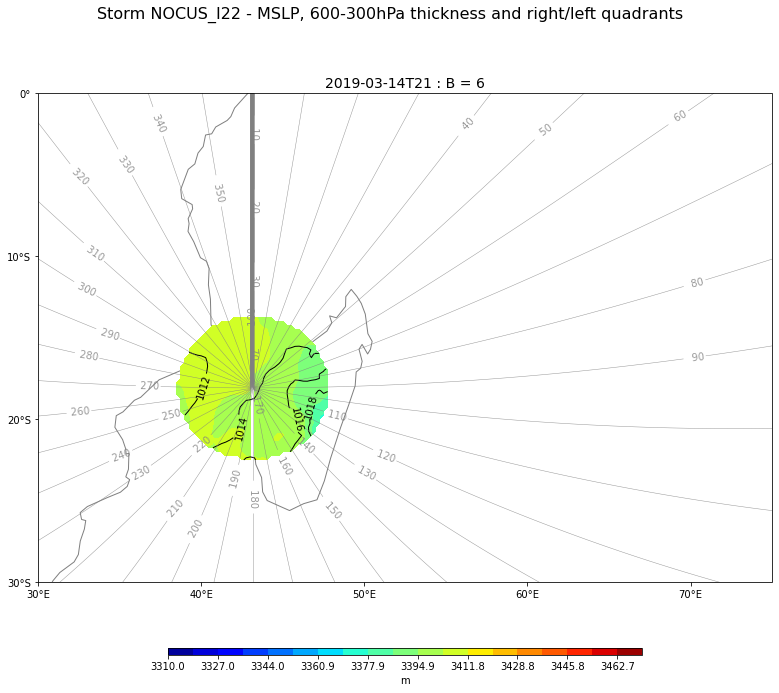

In [107]:
B=B1
levels=np.arange(0,370,10)

fig = plt.figure(figsize=(17., 12.))
ax = fig.add_subplot(1, 1, 1, projection=projection)
fig.suptitle('Storm '+storm+' - MSLP, 600-300hPa thickness and right/left quadrants',fontsize=16)
ax.set_title(str(time[idate])[0:13]+' : B = '+str(int(B)),fontsize=14)
#ax.coastlines()
ax.add_feature(coast, edgecolor='gray')
ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent(*bounds, crs=ccrs.PlateCarree())
 
c0 = ax.contour(lon, lat, data_slp_m, mslp_levels,
                colors="black", linewidths=1, transform=ccrs.PlateCarree())
ax.clabel(c0,fmt='%4.1i',fontsize=10)
cf1 = ax.contourf(lon, lat, Zr_m, dz_levels,
                 cmap='jet', transform=ccrs.PlateCarree())
cf2 = ax.contourf(lon, lat, Zl_m, dz_levels,
                 cmap='jet', transform=ccrs.PlateCarree())
cb = fig.colorbar(cf1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.1)
cb.set_label('m')
c3 = ax.contour(lon, lat, qq_ang_all, levels,
                colors="grey", linewidths=0.5, alpha=0.8, transform=ccrs.PlateCarree())
ax.clabel(c3,fmt='%4.1i',fontsize=10)

plt.show()

In [108]:
B_series=[]

for i in range(len(time)-1):
    print(str(time[i])[0:13])
    data = thickness[i,:,:]
    data_slp = mslp[i,:,:]

    # Center coordinates
    clat = liste_lat[i]
    clon = liste_lon[i]

    # Calculate bearing between center and all other lat/lon pairs
    qq_ang_all=np.zeros([len(lon),len(lat)],dtype='f')
    for x in range(0,len(lon)):
        for y in range(0,len(lat)):
            qq_ang_all[x,y]=get_bearing(clat, clon, lat[y], lon[x])     
    qq_ang_all=np.transpose(qq_ang_all)

    # Angle of travel of the center
    ang=get_bearing(clat, clon, liste_lat[i+1], liste_lon[i+1])

    # Define right/left cadrans
    Zl=np.zeros([len(lat),len(lon)],dtype='f')
    Zr=np.zeros([len(lat),len(lon)],dtype='f')

    for jlat in range(0,len(lat)-1):
        for jlon in range(0,len(lon)-1):
            #set values along great circle line to missing (neither left nor right)
            if qq_ang_all[jlat,jlon] == ang:
                Zl[jlat,jlon] = 0
                Zr[jlat,jlon] = 0
            #for storm travel angles in quadrants 1 and 2 (NE and SE)
            elif (ang >= 0 and ang < 180):
                if (qq_ang_all[jlat,jlon] > ang and qq_ang_all[jlat,jlon]  < ang+180):
                    Zl[jlat,jlon] = 0
                    Zr[jlat,jlon] = data[jlat,jlon]
                else:
                    Zr[jlat,jlon] = 0
                    Zl[jlat,jlon] = data[jlat,jlon]
            #for storm travel angles in quadrants 3 and 4 (NW and SW)
            elif (ang >= 180 and ang < 360):
                if (qq_ang_all[jlat,jlon] > ang-180 and qq_ang_all[jlat,jlon] < ang):
                    Zr[jlat,jlon] = 0
                    Zl[jlat,jlon] = data[jlat,jlon]
                else:
                    Zl[jlat,jlon] = 0
                    Zr[jlat,jlon] = data[jlat,jlon]

    # Calculate distance between center and all other lat/lon pairs
    distance = haversine(lon[:,np.newaxis], lat, clon, clat)
    distance2=np.transpose(distance)
    # Mask distance array where distance > max_dist
    distance_m = np.ma.masked_greater(distance2, max_dist)
    # Mask the data array based on the distance mask
    data_slp_m = np.ma.masked_where(distance2 > max_dist, data_slp)
    Zr_m = np.ma.masked_where(distance2 > max_dist, Zr)
    Zl_m = np.ma.masked_where(distance2 > max_dist, Zl)
    
    Zr_m[Zr_m == 0] = np.nan
    Zl_m[Zl_m == 0] = np.nan

    # cyclone thermal symmetry parameter using weighted average
    #Zr_mean=np.nanmean(Zr_m)
    #Zl_mean=np.nanmean(Zl_m)
    #B=Zr_mean-Zl_mean

    Zr_m = xr.DataArray(Zr_m)
    Zl_m = xr.DataArray(Zl_m)
    weights = xr.DataArray(np.cos(np.deg2rad(Zr_m.shape[0])))
    Zr_weighted = Zr_m.weighted(weights)
    Zl_weighted = Zl_m.weighted(weights)
    Zr_weighted_mean=Zr_weighted.mean()
    Zl_weighted_mean=Zl_weighted.mean()
    B=int(Zr_weighted_mean-Zl_weighted_mean)

    if clat<0:
        B=-B
    #print('B = ',B)
    
    B_series.append(B)

    fig = plt.figure(figsize=(17., 12.))
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    fig.suptitle('Storm '+storm+' - MSLP, 600-300hPa thickness and right/left quadrants',fontsize=16)
    ax.set_title(str(time[i])[0:13]+' : B = '+str(int(B)),fontsize=14)
    #ax.coastlines()
    ax.add_feature(coast, edgecolor='gray')
    ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())

    c0 = ax.contour(lon, lat, data_slp_m, mslp_levels,
                    colors="black", linewidths=1, transform=ccrs.PlateCarree())
    ax.clabel(c0,fmt='%4.1i',fontsize=10)
    cf1 = ax.contourf(lon, lat, Zr_m, dz_levels,
                     cmap='jet', transform=ccrs.PlateCarree())
    cf2 = ax.contourf(lon, lat, Zl_m, dz_levels,
                     cmap='jet', transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.1)
    cb.set_label('m')
    c3 = ax.contour(lon, lat, qq_ang_all, levels,
                    colors="grey", linewidths=0.5, alpha=0.8, transform=ccrs.PlateCarree())
    ax.clabel(c3,fmt='%4.1i',fontsize=10)

    #plt.show()
    #figname='./anim/'+storm+'/Thermal_symmetry_'+str(time[i])[0:13]
    figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/Thermal_symmetry_'+str(time[i])[0:13]
    fig.savefig(figname+'.png',bbox_inches='tight')
    plt.close()


2019-03-11T00
2019-03-11T03
2019-03-11T06
2019-03-11T09
2019-03-11T12
2019-03-11T15
2019-03-11T18
2019-03-11T21
2019-03-12T00
2019-03-12T03
2019-03-12T06
2019-03-12T09
2019-03-12T12
2019-03-12T15
2019-03-12T18
2019-03-12T21
2019-03-13T00
2019-03-13T03
2019-03-13T06
2019-03-13T09
2019-03-13T12
2019-03-13T15
2019-03-13T18
2019-03-13T21
2019-03-14T00
2019-03-14T03
2019-03-14T06
2019-03-14T09
2019-03-14T12
2019-03-14T15
2019-03-14T18
2019-03-14T21
2019-03-15T00
2019-03-15T03
2019-03-15T06
2019-03-15T09
2019-03-15T12


In [109]:
#gif_filepath = './anim/'+storm+'/Thermal_symmetry.gif'
#make_animation2()
#IPdisplay.Image(url=gif_filepath)

[4, -5, 4, -1, -3, 4, 1, 0, 2, -2, 10, -3, 2, 5, 0, 2, 7, -2, 5, 0, 2, -2, 0, 1, 2, 4, 5, 2, 0, 8, -1, 6, -2, 8, 6, 4, 2]


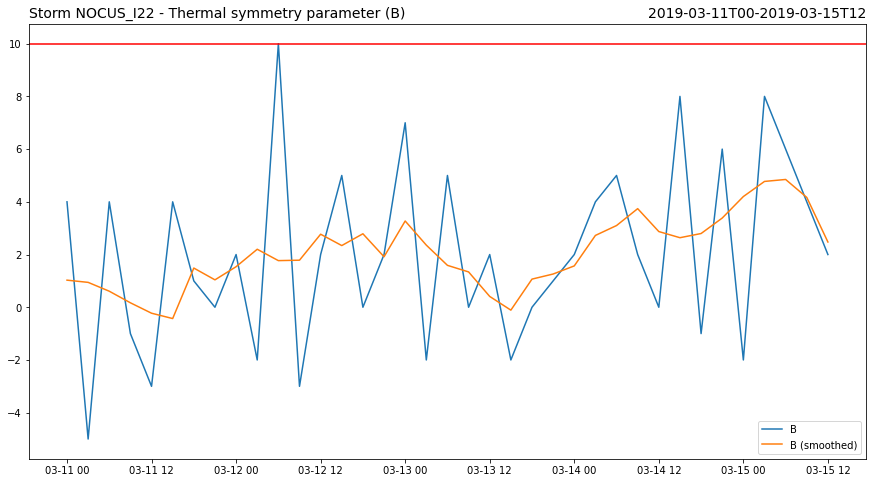

In [110]:
print(B_series)
B_series2 = savgol_filter(B_series, 11, 3)

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm+' - Thermal symmetry parameter (B)'
             ,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
ax.plot(time[0:-1], B_series, label='B')
ax.plot(time[0:-1], B_series2, label='B (smoothed)')
plt.axhline(y=10, color='r')
plt.legend()

#figname='./figs/'+storm+'/Thermal_symmetry_timeseries'
figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/Thermal_symmetry_timeseries' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')

In [111]:
print(lev)
#listlev1=[900, 850, 800, 750, 700, 650, 600]
listlev1=[900, 600]
listlev11=[n * 100 for n in listlev1]
lnP1=np.log(listlev11)
listlev2=[600, 300] #[600, 550, 500, 450, 400, 350,
listlev22=[n * 100 for n in listlev2]
lnP2=np.log(listlev22)

[300 600 900]


In [112]:
idate=31
clat = liste_lat[idate]
clon = liste_lon[idate]

deltaZ1=[]
deltaZ2=[]

#boucle sur les niveaux de 900 à 600
for plev in listlev1:

    ilev = list(lev).index(plev)
    data_z1 = z[idate,ilev,:,:]

    # Calculate distance between center and all other lat/lon pairs
    distance = haversine(lon[:,np.newaxis], lat, clon, clat)
    distance2=np.transpose(distance)
    # Mask distance array where distance > max_dist
    distance_m = np.ma.masked_greater(distance2, max_dist)
    # Mask the data array based on the distance mask
    data_z1_m = np.ma.masked_where(distance2 > max_dist, data_z1)
    zmin=np.min(data_z1_m)
    zmax=np.max(data_z1_m)
    delta_z1=zmax-zmin
    deltaZ1.append(int(delta_z1))

#boucle sur les niveaux de 600 à 300
for plev in listlev2:

    ilev = list(lev).index(plev)
    data_z2 = z[idate,ilev,:,:]

    # Calculate distance between center and all other lat/lon pairs
    distance = haversine(lon[:,np.newaxis], lat, clon, clat)
    distance2=np.transpose(distance)
    # Mask distance array where distance > max_dist
    distance_m = np.ma.masked_greater(distance2, max_dist)
    # Mask the data array based on the distance mask
    data_z2_m = np.ma.masked_where(distance2 > max_dist, data_z2)
    zmin=np.min(data_z2_m)
    zmax=np.max(data_z2_m)
    delta_z2=zmax-zmin
    deltaZ2.append(int(delta_z2))
    
print(deltaZ1)
print(deltaZ2)

[34, 26]
[26, 34]


9734.69
9700.009


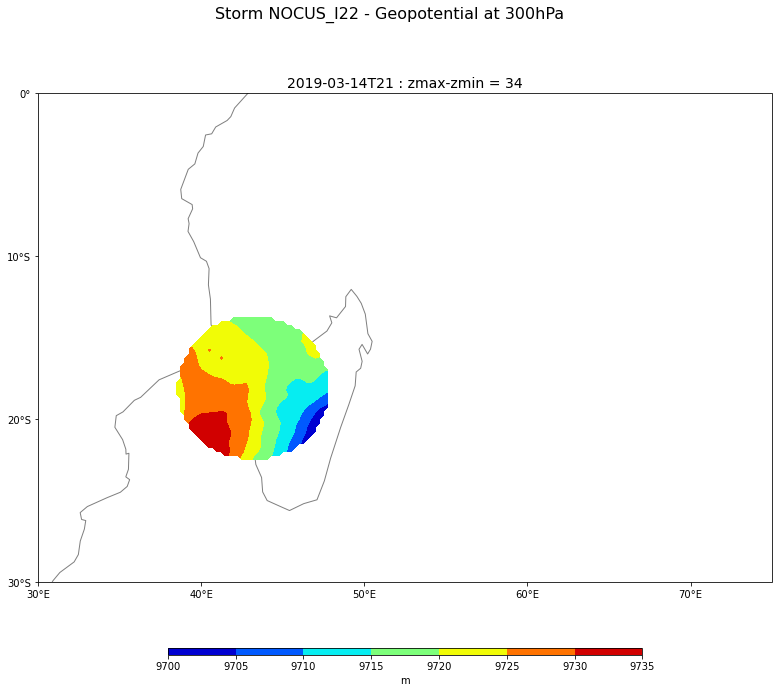

In [113]:
print(zmax)
print(zmin)

fig = plt.figure(figsize=(17., 12.))
ax = fig.add_subplot(1, 1, 1, projection=projection)
fig.suptitle('Storm '+storm+' - Geopotential at '+str(plev)+ 'hPa',fontsize=16)
ax.set_title(str(time[idate])[0:13]+ ' : zmax-zmin = '+str(int(delta_z2)),fontsize=14)
#ax.coastlines()
ax.add_feature(coast, edgecolor='gray')
ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent(*bounds, crs=ccrs.PlateCarree())
 
cf = ax.contourf(lon, lat, data_z2_m,
                     cmap='jet', transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.1)
cb.set_label('m')

plt.show()

[19.7304277] [-11.54156033]
19.730427699011486 -11.541560327111705


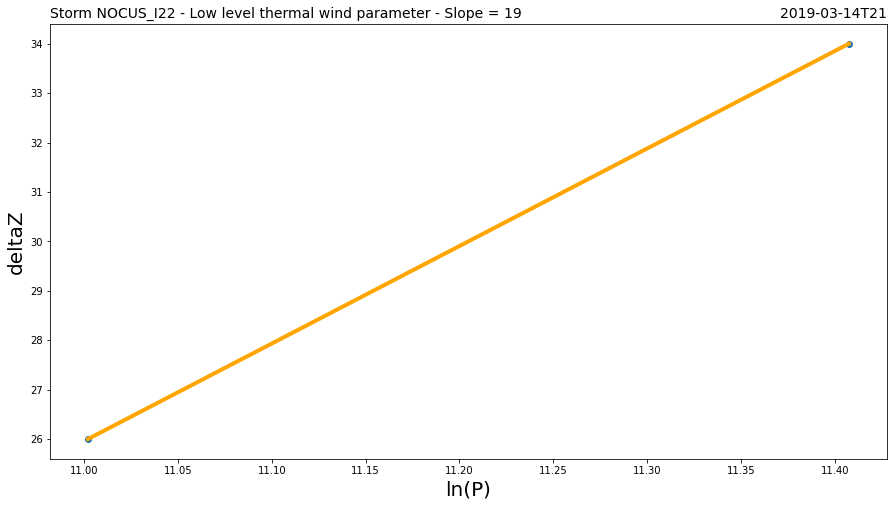

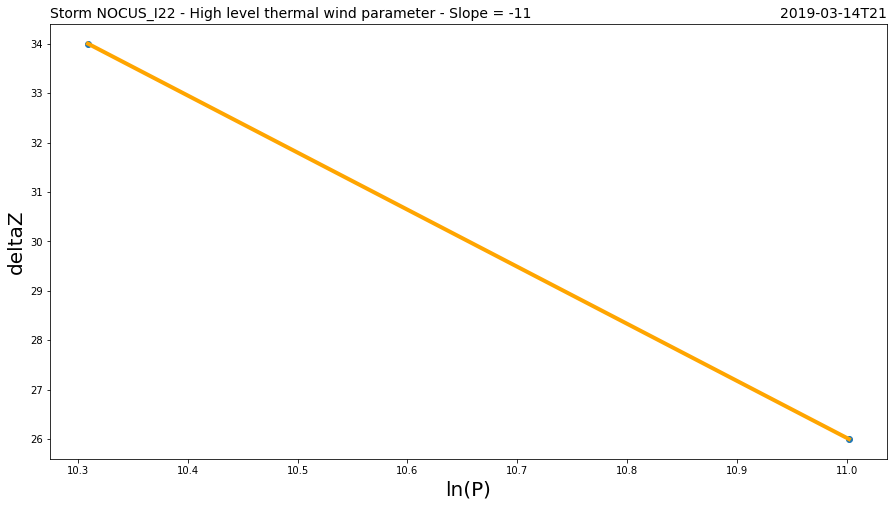

In [114]:
X1 = np.reshape(lnP1, (len(lnP1), 1))
y1 =  deltaZ1
model = LinearRegression().fit(X1, y1)
model.fit(X1, y1)
yhat1 = model.predict(X1)
reg = LinearRegression().fit(X1, y1)
VTL=reg.coef_

X2 = np.reshape(lnP2, (len(lnP2), 1))
y2 =  deltaZ2
model = LinearRegression().fit(X2, y2)
model.fit(X2, y2)
yhat2 = model.predict(X2)
reg = LinearRegression().fit(X2, y2)
VTU=reg.coef_
VTLb=(deltaZ1[-1]-deltaZ1[0])/(lnP1[-1]-lnP1[0])
VTUb=(deltaZ2[-1]-deltaZ2[0])/(lnP2[-1]-lnP2[0])
print(VTL,VTU)
print(VTLb,VTUb)
#[41.66584047] [79.51293095]
#39.46085539802297 67.80666692178127
fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm+' - Low level thermal wind parameter - Slope = '+str(int(VTL))
             ,loc='left',fontsize=14)
ax.set_title(str(time[idate])[0:13],loc='right',fontsize=14)
plt.scatter(lnP1, deltaZ1)
plt.plot(lnP1,yhat1, lw=4, c="orange", label = "regression line")
plt.xlabel("ln(P)", fontsize = 20)
plt.ylabel("deltaZ", fontsize = 20)
 
plt.show()

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm+' - High level thermal wind parameter - Slope = '+str(int(VTU))
             ,loc='left',fontsize=14)
ax.set_title(str(time[idate])[0:13],loc='right',fontsize=14)
plt.scatter(lnP2, deltaZ2)
plt.plot(lnP2,yhat2, lw=4, c="orange", label = "regression line")
plt.xlabel("ln(P)", fontsize = 20)
plt.ylabel("deltaZ", fontsize = 20)
 
plt.show()

In [115]:
VTL_series=[]
VTU_series=[]
VTL_seriesb=[]
VTU_seriesb=[]

for i in range(len(time)-1):
    print(str(time[i])[0:13])

    # Center coordinates
    clat = liste_lat[i]
    clon = liste_lon[i]
    deltaZ1=[]
    deltaZ2=[]

    for plev in listlev1:

        ilev = list(lev).index(plev)
        data_z1 = z[i,ilev,:,:]
        # Calculate distance between center and all other lat/lon pairs
        distance = haversine(lon[:,np.newaxis], lat, clon, clat)
        distance2=np.transpose(distance)
        # Mask distance array where distance > max_dist
        distance_m = np.ma.masked_greater(distance2, max_dist)
        # Mask the data array based on the distance mask
        data_z1_m = np.ma.masked_where(distance2 > max_dist, data_z1)
        zmin=np.min(data_z1_m)
        zmax=np.max(data_z1_m)
        delta_z1=zmax-zmin
        deltaZ1.append(int(delta_z1))

    for plev in listlev2:

        ilev = list(lev).index(plev)
        data_z2 = z[i,ilev,:,:]

        # Calculate distance between center and all other lat/lon pairs
        distance = haversine(lon[:,np.newaxis], lat, clon, clat)
        distance2=np.transpose(distance)
        # Mask distance array where distance > max_dist
        distance_m = np.ma.masked_greater(distance2, max_dist)
        # Mask the data array based on the distance mask
        data_z2_m = np.ma.masked_where(distance2 > max_dist, data_z2)
        zmin=np.min(data_z2_m)
        zmax=np.max(data_z2_m)
        delta_z2=zmax-zmin
        deltaZ2.append(int(delta_z2))

    X1 = np.reshape(lnP1, (len(lnP1), 1))
    y1 =  deltaZ1
    model = LinearRegression().fit(X1, y1)
    model.fit(X1, y1)
    yhat1 = model.predict(X1)
    reg = LinearRegression().fit(X1, y1)
    coef1=reg.coef_
    coef1b=(deltaZ1[-1]-deltaZ1[0])/(lnP1[-1]-lnP1[0])
    VTL_series.append(int(coef1))
    VTL_seriesb.append(int(coef1b))

    X2 = np.reshape(lnP2, (len(lnP2), 1))
    y2 =  deltaZ2
    model = LinearRegression().fit(X2, y2)
    model.fit(X2, y2)
    yhat2 = model.predict(X2)
    reg = LinearRegression().fit(X2, y2)
    coef2=reg.coef_
    coef2b=(deltaZ2[-1]-deltaZ2[0])/(lnP2[-1]-lnP2[0])
    VTU_series.append(int(coef2))
    VTU_seriesb.append(int(coef2b))

2019-03-11T00
2019-03-11T03
2019-03-11T06
2019-03-11T09
2019-03-11T12
2019-03-11T15
2019-03-11T18
2019-03-11T21
2019-03-12T00
2019-03-12T03
2019-03-12T06
2019-03-12T09
2019-03-12T12
2019-03-12T15
2019-03-12T18
2019-03-12T21
2019-03-13T00
2019-03-13T03
2019-03-13T06
2019-03-13T09
2019-03-13T12
2019-03-13T15
2019-03-13T18
2019-03-13T21
2019-03-14T00
2019-03-14T03
2019-03-14T06
2019-03-14T09
2019-03-14T12
2019-03-14T15
2019-03-14T18
2019-03-14T21
2019-03-15T00
2019-03-15T03
2019-03-15T06
2019-03-15T09
2019-03-15T12


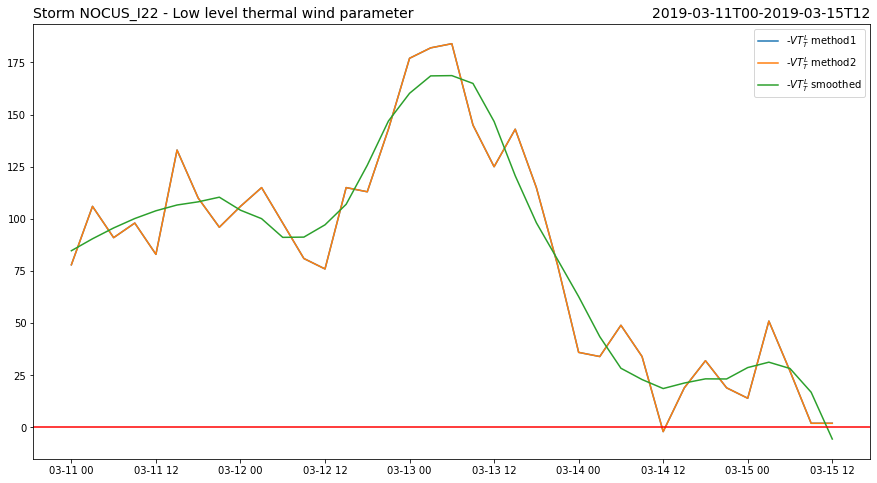

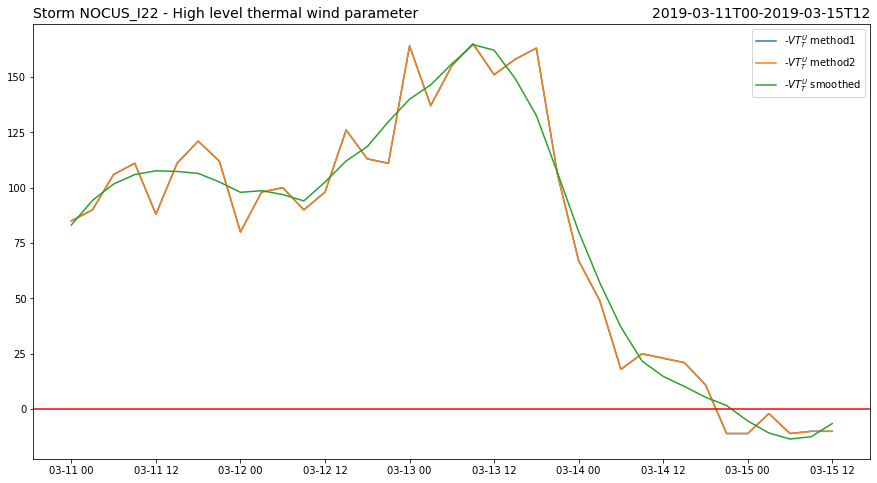

In [116]:
VTU_series2 = savgol_filter(VTU_series, 11, 3)
VTL_series2 = savgol_filter(VTL_series, 11, 3)

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm+' - Low level thermal wind parameter'
             ,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
ax.plot(time[0:-1], VTL_series, label='-$VT_T^L$ method1')
ax.plot(time[0:-1], VTL_seriesb, label='-$VT_T^L$ method2')
ax.plot(time[0:-1], VTL_series2, label='-$VT_T^L$ smoothed')


plt.axhline(y=0, color='r')
plt.legend()

plt.show()

#figname='./figs/'+storm+'/VTL_timeseries'
#fig.savefig(figname+'.png',bbox_inches='tight')

figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/VTL_timeseries' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')




fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm+' - High level thermal wind parameter'
             ,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
ax.plot(time[0:-1], VTU_series, label='-$VT_T^U$ method1')
ax.plot(time[0:-1], VTU_seriesb, label='-$VT_T^U$ method2')
ax.plot(time[0:-1], VTU_series2, label='-$VT_T^U$ smoothed')


plt.axhline(y=0, color='r')
plt.legend()

plt.show()

#figname='./figs/'+storm+'/VTU_timeseries'
figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/VTU_timeseries' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')


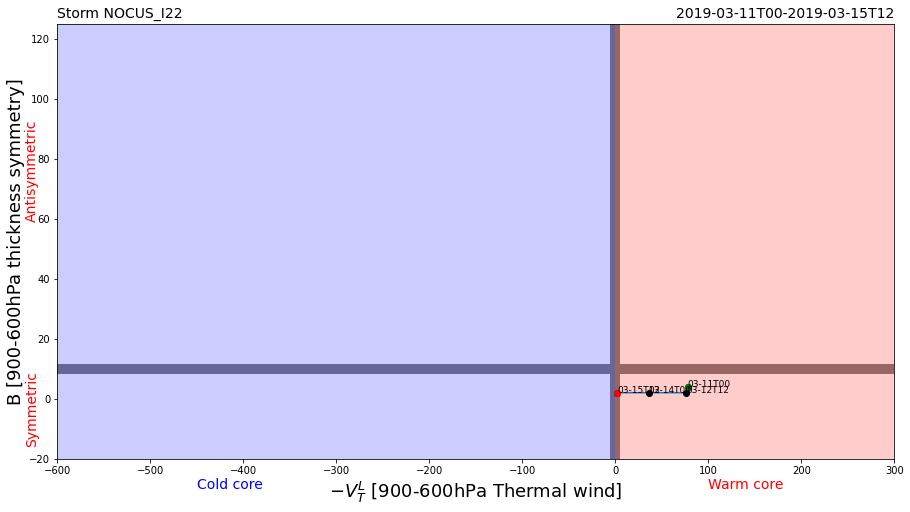

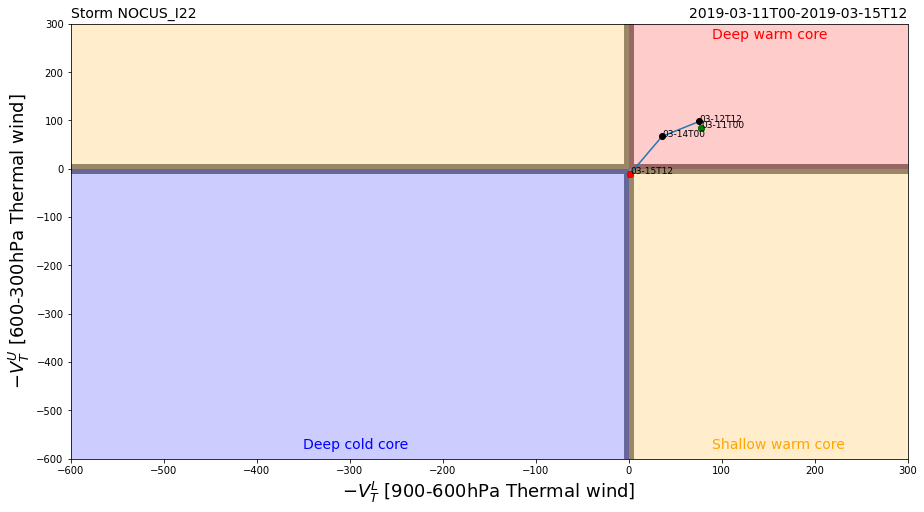

In [117]:
time_str=[x for x in range(len(time)-1)]
date_str=[x for x in range(len(time)-1)]
for i in range(len(time)-1):
    time_str[i] = str(time[i])
    date_str[i] = time_str[i][5:13]

step=12

newdate=date_str[0::step]
new_VTL=VTL_series[0::step]
new_VTU=VTU_series[0::step]
new_B=B_series[0::step]

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
plt.axhline(y=10, color='grey', linewidth=10,zorder=1)
plt.axvline(x=0, color='grey', linewidth=10,zorder=1)
plt.plot(VTL_series[::step], B_series[::step])
plt.scatter(VTL_series[::step],  B_series[::step], c='k',zorder=2)
plt.scatter(VTL_series[0], B_series[0], c='green',zorder=2)
plt.scatter(VTL_series[-1], B_series[-1], c='red',zorder=2)
plt.xlabel("$-V_T^L$ [900-600hPa Thermal wind]", fontsize = 18)
plt.ylabel("B [900-600hPa thickness symmetry]", fontsize = 18)

plt.text(-635,-15,'Symmetric', rotation=90., color='red', fontsize = 14)
plt.text(-635, 60,'Antisymmetric', rotation=90., color='red', fontsize = 14)
plt.text(-450, -30,'Cold core', rotation=0., color='blue', fontsize = 14)
plt.text(100, -30,'Warm core', rotation=0., color='red', fontsize = 14)
plt.xlim(-600, 300)
plt.ylim(-20, 125)
    
for i,type in enumerate(newdate):
    x = new_VTL[i]
    y = new_B[i]
    plt.text(x, y, type, fontsize=9)
    
xrange = [(-600, 600)]
yrange1 = (-20, 30)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='blue', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (10, 130)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='blue', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (-20, 30)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='red', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (10, 130)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='red', alpha=0.2)
ax.add_collection(c1)

plt.show()

#figname='./figs/'+storm+'/CPS1'
#fig.savefig(figname+'.png',bbox_inches='tight')

figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/CPS1' #'+str(time[i])[0:13] 
fig.savefig(figname+'.png',bbox_inches='tight')


fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
plt.axhline(y=0, color='grey', linewidth=10,zorder=1)
plt.axvline(x=0, color='grey', linewidth=10,zorder=1)
plt.plot(VTL_series[::step], VTU_series[::step])
plt.scatter(VTL_series[::step], VTU_series[::step], c='k',zorder=2)
plt.scatter(VTL_series[0], VTU_series[0], c='green',zorder=2)
plt.scatter(VTL_series[-1], VTU_series[-1], c='red',zorder=2)


plt.xlabel("$-V_T^L$ [900-600hPa Thermal wind]", fontsize = 18)
plt.ylabel("$-V_T^U$ [600-300hPa Thermal wind]", fontsize = 18)
plt.text(-350, -580,'Deep cold core', rotation=0., color='blue', fontsize = 14)
plt.text(90, 270,'Deep warm core', rotation=0., color='red', fontsize = 14)
plt.text(90, -580,'Shallow warm core', rotation=0., color='orange', fontsize = 14)

plt.xlim(-600, 300)
plt.ylim(-600, 300)

for i,type in enumerate(newdate):
    x = new_VTL[i]
    y = new_VTU[i]
    plt.text(x, y, type, fontsize=9)

xrange = [(0, 300)]
yrange1 = (0, 300)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='r', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (-600, 600)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='b', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (0, 300)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='orange', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (-600, 600)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='orange', alpha=0.2)
ax.add_collection(c1)

plt.show()

#figname='./figs/'+storm+'/CPS2'
#fig.savefig(figname+'.png',bbox_inches='tight')

figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/CPS2' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')

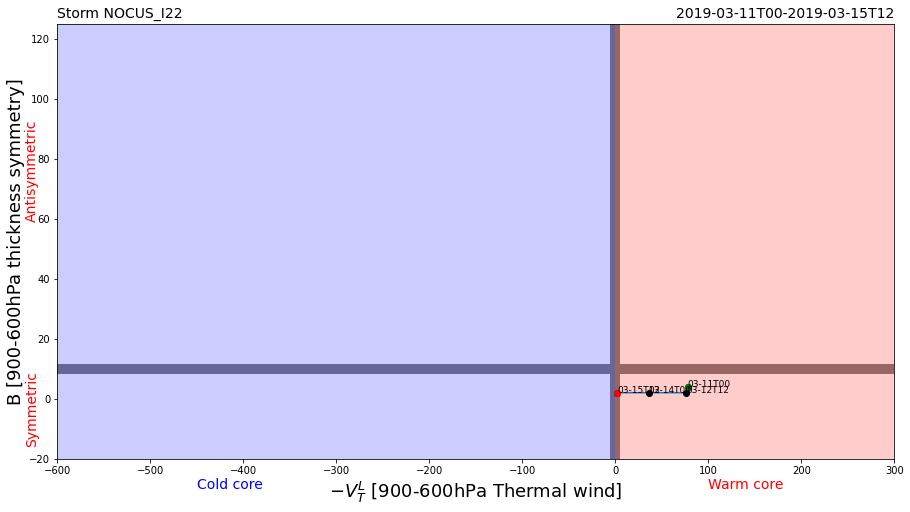

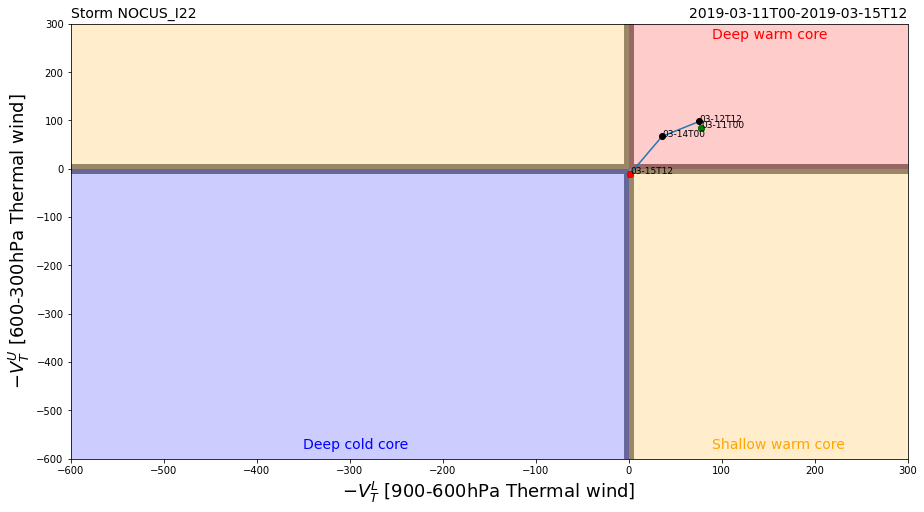

In [118]:
time_str=[x for x in range(len(time)-1)]
date_str=[x for x in range(len(time)-1)]
for i in range(len(time)-1):
    time_str[i] = str(time[i])
    date_str[i] = time_str[i][5:13]

step=12

newdate=date_str[0::step]
new_VTL=VTL_seriesb[0::step]
new_VTU=VTU_seriesb[0::step]
new_B=B_series[0::step]

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
plt.axhline(y=10, color='grey', linewidth=10,zorder=1)
plt.axvline(x=0, color='grey', linewidth=10,zorder=1)
plt.plot(VTL_seriesb[::step], B_series[::step])
plt.scatter(VTL_seriesb[::step],  B_series[::step], c='k',zorder=2)
plt.scatter(VTL_seriesb[0], B_series[0], c='green',zorder=2)
plt.scatter(VTL_seriesb[-1], B_series[-1], c='red',zorder=2)
plt.xlabel("$-V_T^L$ [900-600hPa Thermal wind]", fontsize = 18)
plt.ylabel("B [900-600hPa thickness symmetry]", fontsize = 18)

plt.text(-635,-15,'Symmetric', rotation=90., color='red', fontsize = 14)
plt.text(-635, 60,'Antisymmetric', rotation=90., color='red', fontsize = 14)
plt.text(-450, -30,'Cold core', rotation=0., color='blue', fontsize = 14)
plt.text(100, -30,'Warm core', rotation=0., color='red', fontsize = 14)
plt.xlim(-600, 300)
plt.ylim(-20, 125)
    
for i,type in enumerate(newdate):
    x = new_VTL[i]
    y = new_B[i]
    plt.text(x, y, type, fontsize=9)
    
xrange = [(-600, 600)]
yrange1 = (-20, 30)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='blue', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (10, 130)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='blue', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (-20, 30)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='red', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (10, 130)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='red', alpha=0.2)
ax.add_collection(c1)

plt.show()

#figname='./figs/'+storm+'/CPS1b'
figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/CPS1b' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')

fig = plt.figure(figsize=(15., 8.))
ax = fig.add_subplot(111)
ax.set_title('Storm '+storm,loc='left',fontsize=14)
ax.set_title(str(time[0])[0:13]+'-'+str(time[-2])[0:13],loc='right',fontsize=14)
plt.axhline(y=0, color='grey', linewidth=10,zorder=1)
plt.axvline(x=0, color='grey', linewidth=10,zorder=1)
plt.plot(VTL_seriesb[::step], VTU_seriesb[::step])
plt.scatter(VTL_seriesb[::step], VTU_seriesb[::step], c='k',zorder=2)
plt.scatter(VTL_seriesb[0], VTU_seriesb[0], c='green',zorder=2)
plt.scatter(VTL_seriesb[-1], VTU_seriesb[-1], c='red',zorder=2)


plt.xlabel("$-V_T^L$ [900-600hPa Thermal wind]", fontsize = 18)
plt.ylabel("$-V_T^U$ [600-300hPa Thermal wind]", fontsize = 18)
plt.text(-350, -580,'Deep cold core', rotation=0., color='blue', fontsize = 14)
plt.text(90, 270,'Deep warm core', rotation=0., color='red', fontsize = 14)
plt.text(90, -580,'Shallow warm core', rotation=0., color='orange', fontsize = 14)

plt.xlim(-600, 300)
plt.ylim(-600, 300)

for i,type in enumerate(newdate):
    x = new_VTL[i]
    y = new_VTU[i]
    plt.text(x, y, type, fontsize=9)

xrange = [(0, 300)]
yrange1 = (0, 300)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='r', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (-600, 600)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='b', alpha=0.2)
ax.add_collection(c1)
xrange = [(-600, 600)]
yrange1 = (0, 300)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='orange', alpha=0.2)
ax.add_collection(c1)
xrange = [(0, 300)]
yrange1 = (-600, 600)
c1 = collections.BrokenBarHCollection(xrange, yrange1, facecolor='orange', alpha=0.2)
ax.add_collection(c1)

plt.show()

#figname='./figs/'+storm+'/CPS2b'
figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/CPS2b' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')


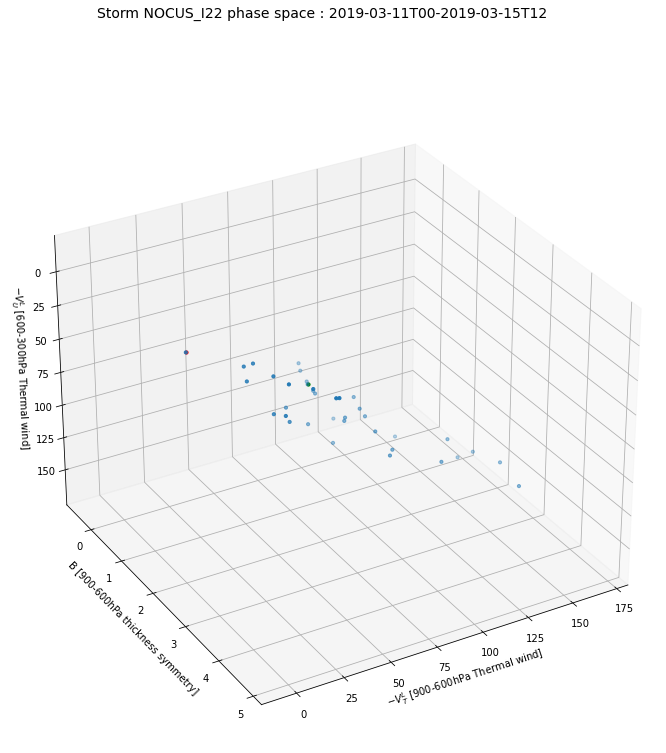

In [119]:
fig = plt.figure(figsize=(12, 12))
ax.set_title('Storm '+storm,loc='left',fontsize=14)

fig.suptitle('Storm '+storm+' phase space : '+str(time[0])[0:13]+'-'+str(time[-2])[0:13], fontsize=14)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$-V_T^L$ [900-600hPa Thermal wind]")
ax.set_ylabel("B [900-600hPa thickness symmetry]")
ax.set_zlabel("$-V_U^L$ [600-300hPa Thermal wind]")
ax.scatter(VTL_series2, B_series2, VTU_series2, s=10)
ax.scatter(VTL_series2[0], B_series2[0], VTU_series2[0], c='green', s=10)
ax.scatter(VTL_series2[-1], B_series2[-1], VTU_series2[-1], c='red', s=10)
ax.view_init(-150, 300)
plt.show()
#figname='./figs/'+storm+'/CPS_3d'
figname='/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/mslp/'+storm+'/CPS_3d' #'+str(time[i])[0:13]
fig.savefig(figname+'.png',bbox_inches='tight')

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600    # Res
g = 9.81 # m/s^2
L = 25   # m
m = 40   # kg

def approx(t, theta0):
    """ Evaluates the analytical approximation. """
    return theta0*np.cos(t*(g/L)**.5)

def RHS(theta, w, dt):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a simple pendulum.
    """
    dw = -np.sin(theta)*dt*g/L
    dtheta = w*dt
    return dtheta, dw

def euler_step(theta, w, dt):
    """ Performs one step of the Euler method. """
    dtheta, dw = RHS(theta, w, dt)
    w = w + dw
    theta = theta + dtheta
    return theta, w


def euler_method(theta0, w0, dt, n):
    """ Performs the Euler method. """
    theta = (n + 1)*[0]
    w = (n + 1)*[0]
    
    theta[0] = theta0
    w[0] = w0
    for i in range(n):
        theta[i + 1], w[i + 1] = euler_step(theta[i], w[i], dt) 
    
    return theta, w



g = 9.81    # m/s^2. Gravitational acc
m = 1.      # kg. Mass
L = 1.      # m. Length of rod
w0 = 10     # 1/s. Initial angular velocity
theta0 = 3. # rad. Initial angle
T = 20.     # s. Time of simulation
n = 100000  # Number of steps
b = .5      # kg m. Damping factor

t = np.linspace(0, T, n + 1)
theta, _ = euler_method(theta0, w0, T/float(n), n)

x = np.sin(theta)
y = -np.cos(theta)

from matplotlib import animation
from IPython.display import HTML
FPS=30
plt.style.use('default')

# Set up the figure
fig = plt.figure(figsize=(4, 4), dpi=60)
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
ax.set_aspect('equal')
ax.axis('off')

# Define the different elements in the animation
rod, = ax.plot([], [], color="grey", linewidth=2)
ball = plt.Circle((x[0], y[0]), 0.1, fc="grey")
ax.add_patch(ball)

# Calculates the number of frames
framesNum = int(FPS*t[-1])

# Animation function. This is called sequentially.
def animate(j):
    i = j*int(n/framesNum)
    ball.center = (x[i], y[i])
    rod.set_data([0, x[i]], [0, y[i]])

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS)

plt.close(anim._fig)

# Display the animation
#HTML(anim.to_html5_video())